# 주제분석
1. Risk Factors for Cardiovascular Heart Disease
- 심장질환에 미치는 위험요소

### 데이터 분석 순서
- 이진 분류 데이터 세트 찾기
- 탐색(시각화)
- 전처리(비중): 10% 가 넘으면 대체
- 데이터 세트 분리(stratify=True)
- GridSearchCV(DTC) : 교차검증
- fit: graphviz
- predict (정확도)
- 오차행렬
- proba
- 정밀도, 재현율 수립
- cuv -> thresholds
- 조정

- index: index
- id : id
- age : 나이
- gender : 성별
- height : 키
- weight :몸무게
- ap_hi : 수축기 혈압  
  (성인의 일반적인 정상 수축기 혈압: 90~120 mmHg)
- ap_lo : 이완기 혈압  
  (성인의 일반적인 정상 이완기 혈압: 60~80 mmHg)
- cholesterol : 콜레스테롤 (1: 정상, 2: 조금 높음, 3: 아주 높음)
- gluc : 혈당 (1: 정상, 2: 조금 높음, 3: 아주 높음)
- smoke : 흡연여부
- alco : 음주여부
- active : 주당 운동량 
- cardio: 심장질환 (target)

##### 🚩정리

1. 여러 개의 임계값에 대한 정밀도와 재현율을 확인한다.
> precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)

2. 위의 임계값에 대한 다양한 평가 지표를 확인한다.
> get_evaluation_by_thresholds(y_test, proba_class1.reshape(-1, 1), thresholds)

3. 원하는 임계값으로 설정하여 다시 한 번 다양한 평가 지표를 확인한다.
> custom_proba = dtc.proba(X_test)[:, 1].reshape(-1, 1)
> prediction = Binarizer(threshold=0.52).fit_transform(custom_proba)
> get_evaluation(y_test, prediction, dtc, X_test)

4. 해당 임계값으로 설정된 모델의 prediction을 사용한다.

In [1]:
import pandas as pd

path = './datasets/heart_data.csv'
h_df = pd.read_csv(path)
h_df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
h_need_df = h_df.copy()
h_need_df.columns

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [3]:
# 데이터 전처리 작업
# 1. id 중복값 확인 후 삭제
# 2. age의 경우 태어난 일자를 뜻하며 현재 기준으로 살아온 날짜로 변경, 컬럼 변경 필요 없음

In [4]:
h_need_df = h_need_df.drop(labels = ['id'], axis =1).reset_index(drop=True)
h_need_df.rename(columns = {'index':'No'}, inplace =True)
h_need_df

,No,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
h_need_df['age'].max() # 23713
h_need_df['age'].min() # 10798
h_need_df['age'] = h_need_df['age'].apply(lambda x: x // 365)
h_need_df

,No,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,61,1,163,72.0,135,80,1,2,0,0,0,1


<Figure size 1200x1000 with 0 Axes>

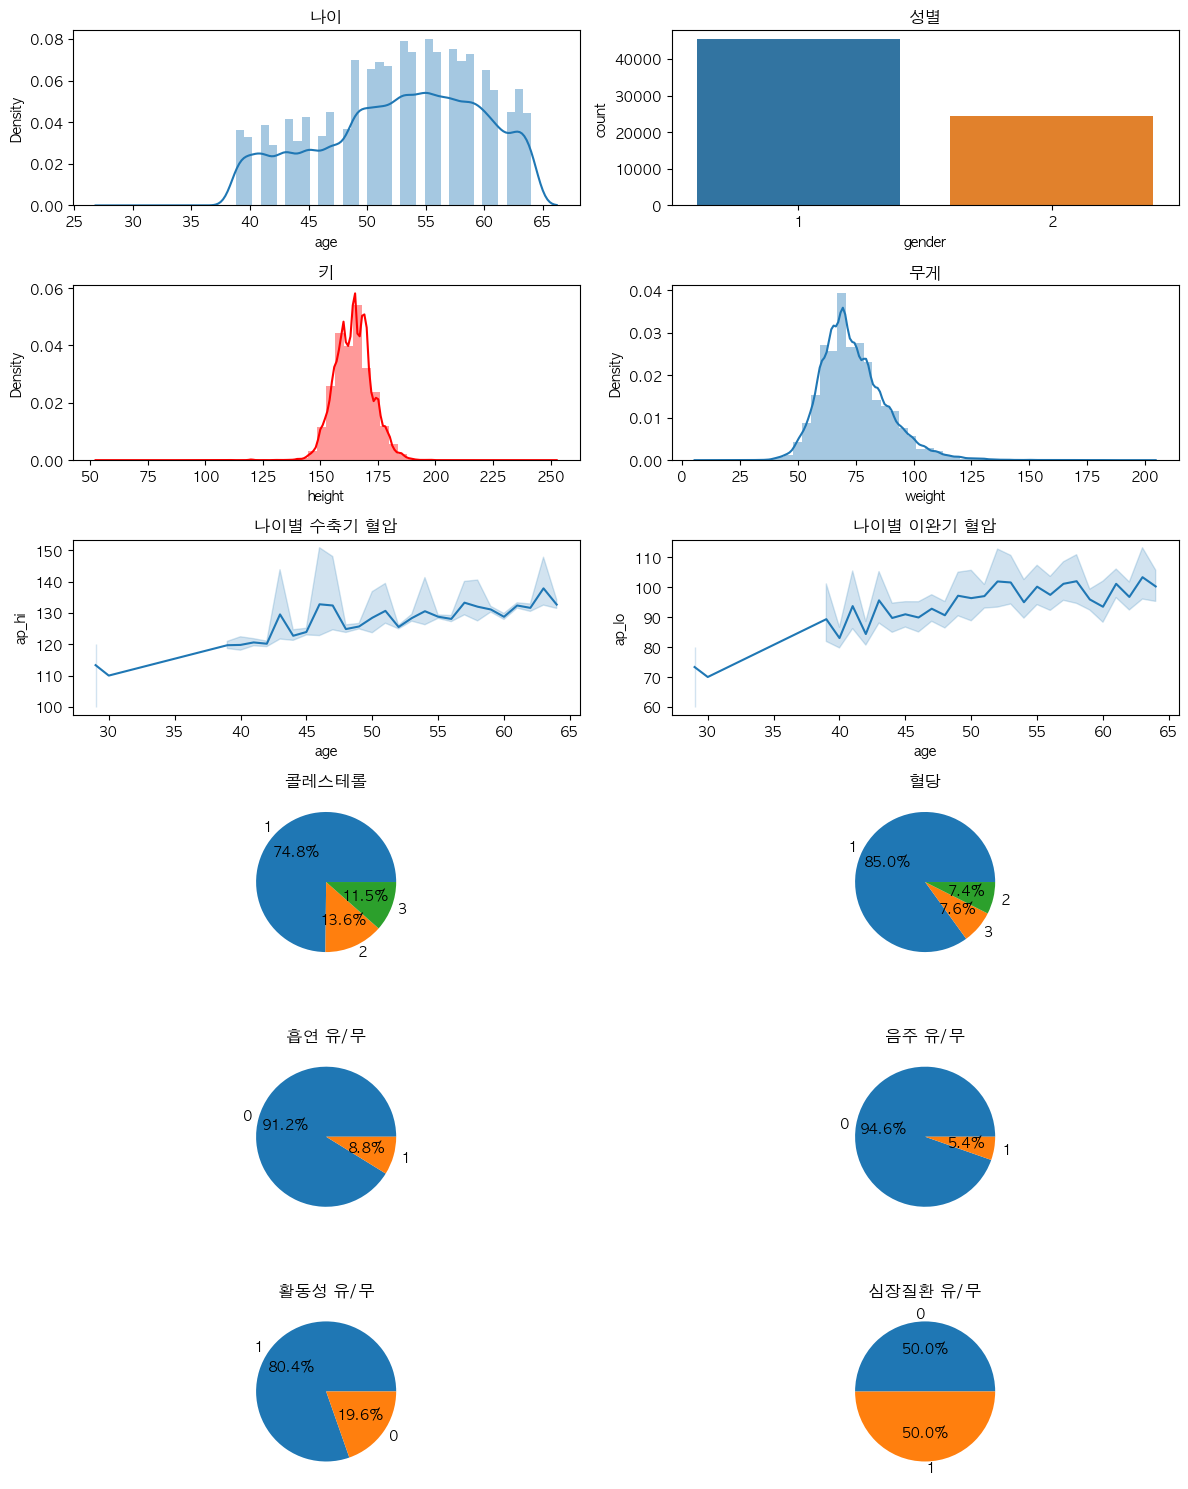

In [6]:
# 데이터 탐색 (각 컬럼에 대하여 특이사항이 육안으로 보이는 지 시각화)
# 시각화를 통한 데이터 탐색
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(6, 2, figsize=(12, 15))

sns.distplot(h_need_df['age'], kde=True,ax=axes[0,0])
axes[0,0].set_title('나이')

sns.countplot(x='gender', data=h_need_df, ax=axes[0,1])
axes[0,1].set_title('성별')

sns.distplot(h_need_df['height'], kde=True,ax=axes[1,0], color='red')
axes[1,0].set_title('키')

sns.distplot(h_need_df['weight'], kde=True,ax=axes[1,1])
axes[1,1].set_title('무게')

sns.lineplot(x='age', y='ap_hi', data=h_need_df, ax=axes[2, 0])
axes[2,0].set_title('나이별 수축기 혈압')

sns.lineplot(x='age', y='ap_lo', data=h_need_df, ax=axes[2, 1])
axes[2,1].set_title('나이별 이완기 혈압')

# 콜레스테롤 파이 차트
cholesterol_counts = h_need_df['cholesterol'].value_counts()
axes[3, 0].pie(cholesterol_counts, labels=cholesterol_counts.index, autopct='%1.1f%%')
axes[3, 0].set_title('콜레스테롤')

# 혈당 파이 차트
gluc_counts = h_need_df['gluc'].value_counts()
axes[3, 1].pie(gluc_counts, labels=gluc_counts.index, autopct='%1.1f%%')
axes[3, 1].set_title('혈당')

# 흡연 여부 파이 차트
smoke_counts = h_need_df['smoke'].value_counts()
axes[4, 0].pie(smoke_counts, labels=smoke_counts.index, autopct='%1.1f%%')
axes[4, 0].set_title('흡연 유/무')

# 음주 여부 파이 차트
alco_counts = h_need_df['alco'].value_counts()
axes[4, 1].pie(alco_counts, labels=alco_counts.index, autopct='%1.1f%%')
axes[4, 1].set_title('음주 유/무')

# 활동성 여부 파이 차트
active_counts = h_need_df['active'].value_counts()
axes[5, 0].pie(active_counts, labels=active_counts.index, autopct='%1.1f%%')
axes[5, 0].set_title('활동성 유/무')

# 심장질환 여부 파이 차트
cardio_counts = h_need_df['cardio'].value_counts()
axes[5, 1].pie(cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%')
axes[5, 1].set_title('심장질환 유/무')

plt.tight_layout()
plt.show()

# 시각화 그래프를확인 했을 떄 나이, 성별, 키, 무게에 대해서는 별다른 특이사항이 보이지 않았습니다.
# 나이별 혈압을 확인 했을 때 나이가 올라갈수록 전반적인 우상향 그래프를 보인다는 것을 확인했습니다.

# 콜레스테롤, 혈당 수치를 확인 했을 때 정상 범주에 있는 사람이 다수 였습니다.
# 흡연, 음주 에 대해서는 음주나 흡연을 하지 않는 사람이 대다수 였고, 활동성의 경우 운동을 하는 사람이 조금 더 적었습니다.
# 이때 심장질환인 사람을 봤을 때 50% 50% 의 비율로 측정이 되었으며 일반적으로 몸이 좋고 나쁜 기능에 따라서 심장질환이 결정되지 않음을 시사할 수 있습니다. 
# 이떄 어떤 독립변수가 심장질환의 비중을 차지 했는지 확인 해보도록 하겠습니다.

In [7]:
# 결측치 확인
h_need_df.isna().sum()

No             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
# 이상치 확인
# 의학 데이터기 때문에 4분위수를 통해 최대 최소 값을 우선적으로 이상치로 가정하고 확인
h_need_df.describe().T

# 수축기와 이완기 혈압에서 음수값과 혈압이 매우 높은 증상 확인
# 음수값이 0 인 데이터에 대해서는 이상치를 추론할 때 문제가 있을 수 있기 때문에 삭제
# iqr 범주를 사용해서 각각의 이상치 제거

,count,mean,std,min,25%,50%,75%,max
No,70000.0,34999.500000,20207.403759,0.0,17499.75,34999.5,52499.25,69999.0
age,70000.0,52.840671,6.766774,29.0,48.00,53.0,58.00,64.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [9]:
# 음수값이 0 인 데이터에 대해서는 이상치를 추론할 때 문제가 있을 수 있기 때문에 삭제
h_need_df = h_need_df[h_need_df['ap_hi'] >= 0].reset_index(drop=True)
h_need_df = h_need_df[h_need_df['ap_lo'] >= 0].reset_index(drop=True)
h_need_df

,No,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69987,69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69988,69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69989,69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69990,69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
# 정상치 범위 확인
# 이상치는 의료데이터기 때문에 별도로 삭제하지 않음
import numpy as np

# ap_hi
ap_hi_Q1 = h_need_df.describe().T.loc['ap_hi', '25%']
ap_hi_Q3 = h_need_df.describe().T.loc['ap_hi', '75%']

ap_hi_iqr = ap_hi_Q3 - ap_hi_Q1

ap_hi_lower_bound = ap_hi_Q1 - ap_hi_iqr * 1.5
ap_hi_uppper_bound = ap_hi_Q3 + ap_hi_iqr * 1.5

# ap_lo
ap_lo_Q1 = h_need_df.describe().T.loc['ap_lo', '25%']
ap_lo_Q3 = h_need_df.describe().T.loc['ap_lo', '75%']

ap_lo_iqr = ap_lo_Q3 - ap_lo_Q1

ap_lo_lower_bound = ap_lo_Q1 - ap_lo_iqr * 1.5
ap_lo_uppper_bound = ap_lo_Q3 + ap_lo_iqr * 1.5

print(f'정상치 범위: {ap_hi_lower_bound} ~ {ap_hi_uppper_bound}')
print(f'정상치 범위: {ap_lo_lower_bound} ~ {ap_lo_uppper_bound}')

정상치 범위: 90.0 ~ 170.0
정상치 범위: 65.0 ~ 105.0


In [11]:
# 이상치 제거 의료 데이터기 때문에 이상치는 제거 하지 않음
# hi_con1 = h_need_df['ap_hi'] < 170
# hi_con2 = h_need_df['ap_hi'] > 90
# hi_con = hi_con1 & hi_con2

# lo_con1 = h_need_df['ap_hi'] < 105
# lo_con2 = h_need_df['ap_hi'] > 65
# lo_con = lo_con1 & lo_con2


# h_need_df = h_need_df[hi_con].reset_index(drop=True)
# h_need_df = h_need_df[lo_con].reset_index(drop=True)
# h_need_df


## 데이터 검증

In [12]:
# 데이터 검증을 위한 분리작업
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

features = h_need_df.iloc[:, :-1] 
targets = h_need_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=321)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [13]:
# 별도의 교차검증 없이 단순 분류를 통해 검증을 했을 때 정확도 확인
# 정확도 확인
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))

print(f'정확도: {accuracy_score(y_test, dtc.predict(X_test.values)) * 100}%')
dtc.feature_importances_

정확도: 62.77591256518322%


array([0.25592738, 0.11451479, 0.01705723, 0.13038945, 0.13845536,
       0.23093399, 0.03806267, 0.03076902, 0.01607426, 0.00849717,
       0.00646352, 0.01285516])

In [14]:
# 교차 검증 
# parameter 값을 위한 과적합 및 분할 개수 확인 
print(dtc.max_depth)  # max_depth 확인 (과적합)
print(dtc.min_samples_split)  # min_samples_split 확인

None
2


In [15]:
# 교차 검증 
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [5, 6, 7, 8, 9], 'min_samples_split': [2, 3, 4, 5, 6]}

g_dtc = GridSearchCV(dtc, param_grid= parameters, cv=5, refit=True, return_train_score=True)

# 교차 검증 진행 (훈련)
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 5, 'min_samples_split': 2}",0.730002,16,0.732119,0.726226,0.725958
1,"{'max_depth': 5, 'min_samples_split': 3}",0.730002,16,0.732119,0.726226,0.725958
2,"{'max_depth': 5, 'min_samples_split': 4}",0.730002,16,0.732119,0.726226,0.725958
3,"{'max_depth': 5, 'min_samples_split': 5}",0.730002,16,0.732119,0.726226,0.725958
4,"{'max_depth': 5, 'min_samples_split': 6}",0.730002,16,0.732119,0.726226,0.725958
5,"{'max_depth': 6, 'min_samples_split': 2}",0.731895,1,0.731137,0.730065,0.729083
6,"{'max_depth': 6, 'min_samples_split': 3}",0.731859,5,0.731226,0.730065,0.728994
7,"{'max_depth': 6, 'min_samples_split': 4}",0.731895,1,0.731226,0.730065,0.728994
8,"{'max_depth': 6, 'min_samples_split': 5}",0.731859,4,0.731137,0.730065,0.728904
9,"{'max_depth': 6, 'min_samples_split': 6}",0.731877,3,0.731226,0.730065,0.728904


In [16]:
# 교차 검증 이후 정확도 확인 
print(g_dtc.best_params_, g_dtc.best_score_, sep='\n')
dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)
g_dtc.best_estimator_
dtc.feature_importances_
g_dtc.cv_results_
# 교차 검증을 진행했을 때 정확도가 63% -> 73% 로 증가한 것을 확인 할 수 있습니다.

{'max_depth': 6, 'min_samples_split': 2}
0.7318951547625137


{'mean_fit_time': array([0.0553916 , 0.05358267, 0.05323944, 0.05395746, 0.05525222,
        0.06249828, 0.06271758, 0.06253867, 0.06207142, 0.06289282,
        0.07115841, 0.07109237, 0.07151995, 0.07107582, 0.071207  ,
        0.08048358, 0.07992215, 0.08017859, 0.07976065, 0.08016853,
        0.08814096, 0.0883069 , 0.0884964 , 0.08821917, 0.08826642]),
 'std_fit_time': array([0.00183938, 0.00017807, 0.0005624 , 0.00045764, 0.0011392 ,
        0.00050483, 0.00025691, 0.00038106, 0.00028734, 0.0002861 ,
        0.0006283 , 0.00023195, 0.00095117, 0.00030606, 0.00068402,
        0.00074855, 0.00051979, 0.00046186, 0.0003727 , 0.00069337,
        0.00016424, 0.00043583, 0.00061664, 0.00066692, 0.00055511]),
 'mean_score_time': array([0.00176668, 0.00160189, 0.00166206, 0.00180416, 0.00194402,
        0.00182285, 0.0017128 , 0.00179386, 0.00171719, 0.00165215,
        0.0018292 , 0.0016974 , 0.00175161, 0.00179257, 0.00175114,
        0.00196042, 0.00182977, 0.00187936, 0.00187836, 0.00

## 교차 검증 이후 중요 컬럼 확인 그래프 비즈를 통한 시각화 확인

In [17]:
# 최적의 모델에서 사용된 매개변수 조합 출력
best_params = g_dtc.best_params_
print("최적의 매개변수 조합:", best_params)

# 최적의 모델에서 사용된 특성 중요도 추출
best_estimator = g_dtc.best_estimator_
feature_importances = best_estimator.feature_importances_

# 중요도가 가장 높은 특성의 인덱스를 찾음 (argsort() -> 배열 높은 순서대로 찾는 메소드)
most_important_features_indices = feature_importances.argsort()[-2:][::-1]
print("가장 중요한 특성의 인덱스:", most_important_features_indices)

# 가장 중요한 특성의 이름 출력
most_important_features_names = h_need_df.columns[most_important_features_indices]
print("가장 중요한 특성의 이름:", most_important_features_names)
# 위 코드에서는 최적의 모델의 매개변수 조합을 출력하고, 해당 모델에서 사용된 특성 중요도를 추출합니다. 그런 다음 중요도가 가장 높은 두 개의 특성을 찾고, 해당 특성의 이름을 출력합니다. 이렇게 하면 가장 중요한 특성을 추출할 수 있습니다.

최적의 매개변수 조합: {'max_depth': 6, 'min_samples_split': 2}
가장 중요한 특성의 인덱스: [5 1]
가장 중요한 특성의 이름: Index(['ap_hi', 'age'], dtype='object')


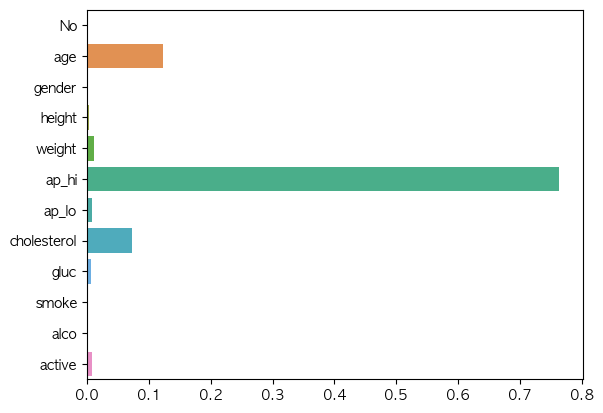

In [18]:
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

In [19]:
# 데이터 분리

features = h_need_df.loc[:, ['age', 'ap_hi']]
targets = h_need_df.loc[:, 'cardio']
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=321)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)



DecisionTreeClassifier()

In [20]:
# 그래프 비즈를 통한 시각화
import graphviz
from sklearn.tree import export_graphviz


h_need_feature_names = h_need_df.loc[:, ['age', 'ap_hi']].columns
h_need_feature_names

export_graphviz(dtc,
               out_file='./images/heart_gird_dtc04.dot',
               class_names = ['0','1'],
               feature_names= h_need_feature_names ,
               impurity = True,
               filled=True)

In [44]:
with open('./images/heart_gird_dtc04.dot') as f:
    heart_gird_dtc04 = f.read()

heart_gird_dtc04_graph = graphviz.Source(heart_gird_dtc04)

In [45]:
heart_gird_dtc04_graph.format = 'png'
heart_gird_dtc04_graph.render(filename='heart_gird_dtc04', directory ='./images', format='png', cleanup=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.587075 to fit


'images/heart_gird_dtc04.png'

<img src='./images/heart_gird_dtc04.png'>

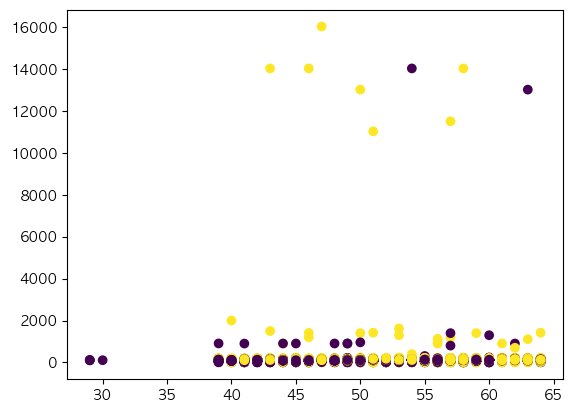

In [23]:
plt.scatter(features.iloc[:,0], features.iloc[:,1], c=targets)

In [24]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

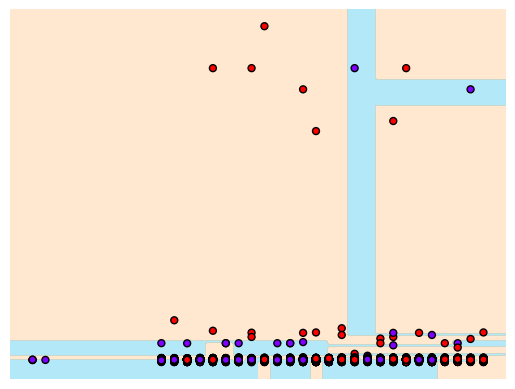

In [25]:
features_0_1 = features.iloc[:, [0, 1]]
visualize_boundary(dtc, features_0_1, targets)

# 그래프 확인결과 당화혈색소와 혈당에 대해서틑 별도의 과적치 없이 뚜렷하게 구분이 가능

In [26]:
from sklearn.metrics import accuracy_score

prediction = dtc.predict(X_test)
print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

# 교차 검증 이후 정확도를 약 10% 정도 올린 부분 확인 (약 63% -> 73%)
# 정확도만으로 데이터의 분석 결과를 확인할 수 없기 때문에 정밀도와 재현율을 확인하여 해당 비중을 확인합니다. 

정확도: 72.7266%


# 여기까지

In [27]:
from sklearn.metrics import accuracy_score

prediction = dtc.predict(X_test)
print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

# 교차 검증 이후 정확도를 약 10% 정도 올린 부분 확인 (약 63% -> 73%)
# 정확도만으로 데이터의 분석 결과를 확인할 수 없기 때문에 정밀도와 재현율을 확인하여 해당 비중을 확인합니다. 

정확도: 72.7266%


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[5402 1602]
 [2216 4779]]
정확도: 0.7273, 정밀도: 0.7489, 재현율: 0.6832, F1: 0.7146, ROC-AUC: 0.7272
################################################################################


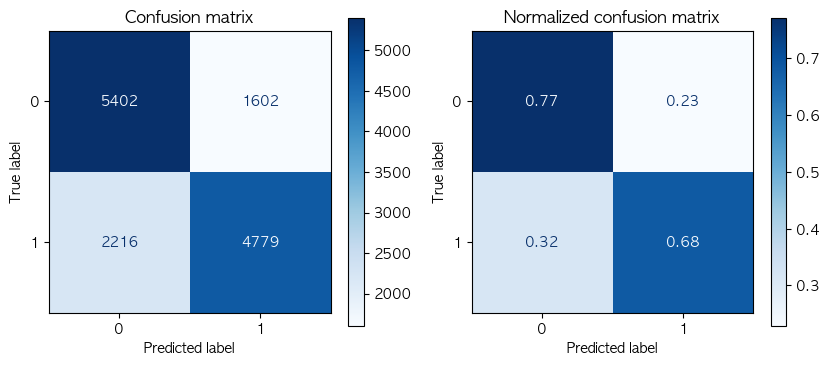

In [29]:
get_evaluation(y_test, prediction, dtc, X_test)
# 재현율, 정밀도 확인 결과 재현율을 높이기 위해 임계치 값을 내려 f1 score 값을 올릴 수 있도록 진행

In [30]:
# 교차훈련까지 한 데이터에 대하여 predict_proba 에 대하여 검증 데이터 범주 반환
# predict() 메소드는 범주를 예측하여 반환하고,
# predict_praba() 메소드는 확률(probability)을 반환합니다.

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.5915399867812293, 0.4084600132187707] 0
[0.1657142857142857, 0.8342857142857143] 1
[0.5122723673792557, 0.48772763262074426] 0
[0.6950570342205323, 0.30494296577946767] 0
[0.501432664756447, 0.498567335243553] 0
[0.6011904761904762, 0.39880952380952384] 0
[0.6493078444297956, 0.35069215557020433] 0
[0.22549019607843138, 0.7745098039215687] 1
[0.16941176470588235, 0.8305882352941176] 1
[0.5605453087409783, 0.43945469125902165] 0
[0.5122723673792557, 0.48772763262074426] 0
[0.4288747346072187, 0.5711252653927813] 1
[0.11737089201877934, 0.8826291079812206] 1
[0.16941176470588235, 0.8305882352941176] 1
[0.6903614457831325, 0.3096385542168675] 0
[0.8074866310160428, 0.1925133689839572] 0
[0.6493078444297956, 0.35069215557020433] 0
[0.8875502008032129, 0.11244979919678715] 0
[0.1261682242990654, 0.8738317757009346] 1
[0.17681728880157171, 0.8231827111984283] 1
[0.5122723673792557, 0.48772763262074426] 0
[0.35795454545454547, 0.6420454545454546] 1
[0.061224489795918366, 0.9387755102040817

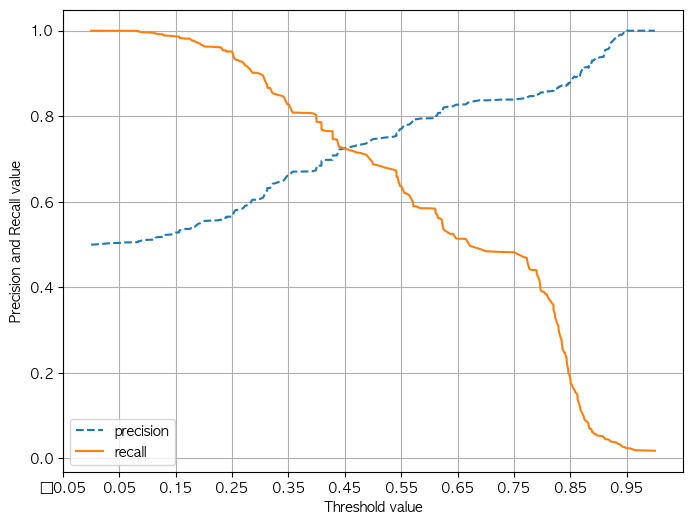

In [31]:
# thresholds 를 판단하기 위해 precision_recall_curve 을 사용
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , proba):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

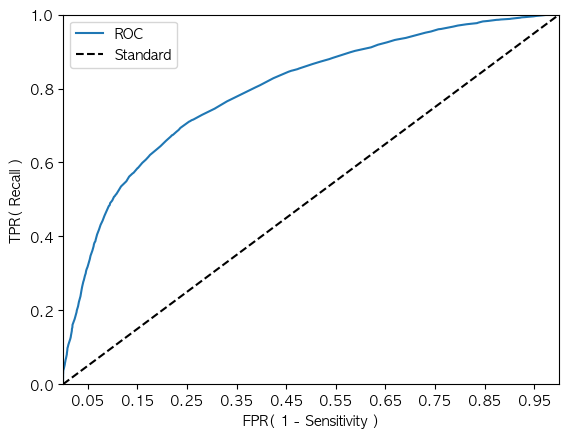

In [32]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [33]:
# threshold 수치 확인
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.03703704, 0.04545455, 0.05673759, 0.05882353,
       0.06666667, 0.08148148, 0.08309456, 0.08333333, 0.0861678 ,
       0.09090909, 0.09375   , 0.1       , 0.10144928, 0.11111111,
       0.1124498 , 0.11347518, 0.11627907, 0.11764706, 0.125     ,
       0.12585034, 0.12698413, 0.12846348, 0.12857143, 0.13043478,
       0.13333333, 0.13636364, 0.13829787, 0.14285714, 0.14634146,
       0.1465798 , 0.14893617, 0.14953271, 0.15602837, 0.15616046,
       0.15686275, 0.16      , 0.16666667, 0.175     , 0.17741935,
       0.17808219, 0.18142549, 0.18181818, 0.18390805, 0.18610422,
       0.19047619, 0.19251337, 0.19482496, 0.2       , 0.20192308,
       0.21367521, 0.2195122 , 0.22580645, 0.22619048, 0.23076923,
       0.23096447, 0.23333333, 0.23970944, 0.24      , 0.25      ,
       0.25104312, 0.25308642, 0.25539568, 0.26062323, 0.26315789,
       0.26683292, 0.27      , 0.27272727, 0.27433628, 0.27552448,
       0.28      , 0.28120516, 0.28571429, 0.29503106, 0.30136

In [34]:
from sklearn.preprocessing import Binarizer

def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

In [35]:
# threshold 값에 따른 정밀도, 재현율 값 확인
get_evaluation_by_thresholds(y_test,proba_class1, thresholds)

0.0
오차 행렬
[[ 109 6895]
 [   0 6995]]
정확도: 0.5075, 정밀도: 0.5036, 재현율: 1.0000, F1: 0.6699, ROC-AUC: 0.5078
################################################################################
0.037037037037037035
오차 행렬
[[ 114 6890]
 [   0 6995]]
정확도: 0.5078, 정밀도: 0.5038, 재현율: 1.0000, F1: 0.6700, ROC-AUC: 0.5081
################################################################################
0.045454545454545456
오차 행렬
[[ 125 6879]
 [   0 6995]]
정확도: 0.5086, 정밀도: 0.5042, 재현율: 1.0000, F1: 0.6704, ROC-AUC: 0.5089
################################################################################
0.05673758865248227
오차 행렬
[[ 152 6852]
 [   1 6994]]
정확도: 0.5105, 정밀도: 0.5051, 재현율: 0.9999, F1: 0.6712, ROC-AUC: 0.5108
################################################################################
0.058823529411764705
오차 행렬
[[ 153 6851]
 [   1 6994]]
정확도: 0.5105, 정밀도: 0.5052, 재현율: 0.9999, F1: 0.6712, ROC-AUC: 0.5109
################################################################################
0.066666

In [36]:
# threshold 수치 값 변경 # 재현율 높이기 f1 올리기
# 재현율을 높이고 정밀도는 떨어지고 f1 스코어도 떨어짐
threshold = 0.35240963855421686

custom_proba = proba_class1
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[4225 2779]
 [1338 5657]]
정확도: 0.7059, 정밀도: 0.6706, 재현율: 0.8087, F1: 0.7332, ROC-AUC: 0.7060
################################################################################


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[4225 2779]
 [1338 5657]]
정확도: 0.7059, 정밀도: 0.6706, 재현율: 0.8087, F1: 0.7332, ROC-AUC: 0.7060
################################################################################


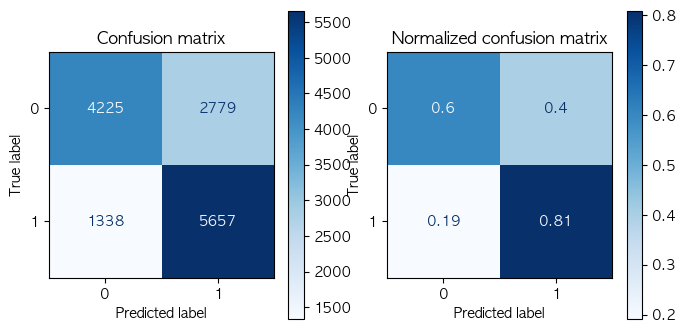

In [38]:
get_evaluation_by_custom_proba(y_test, custom_prediction, True)

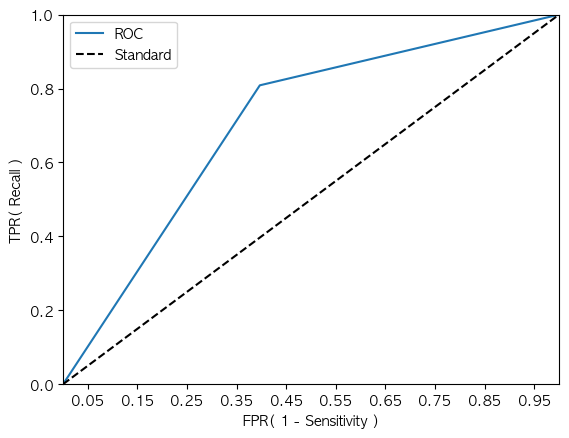

In [39]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , custom_proba):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, custom_proba)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)

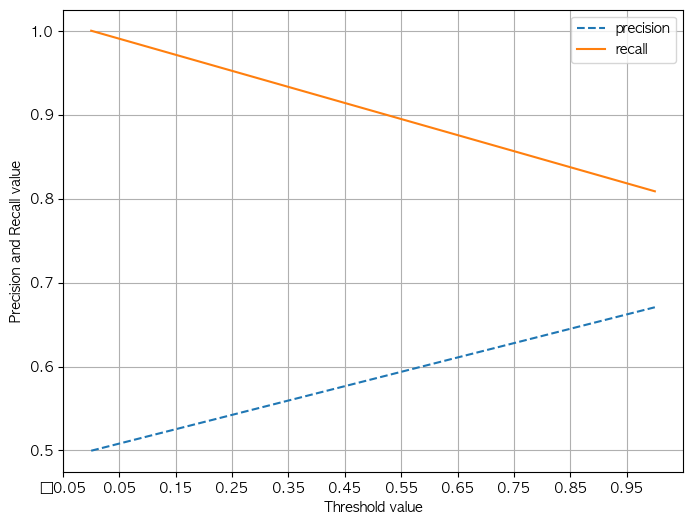

In [40]:
precision_recall_curve_plot(y_test, custom_prediction)

In [41]:
dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
# custom_proba

array([[0.40846001],
       [0.83428571],
       [0.48772763],
       ...,
       [0.35069216],
       [0.3943662 ],
       [0.91176471]])

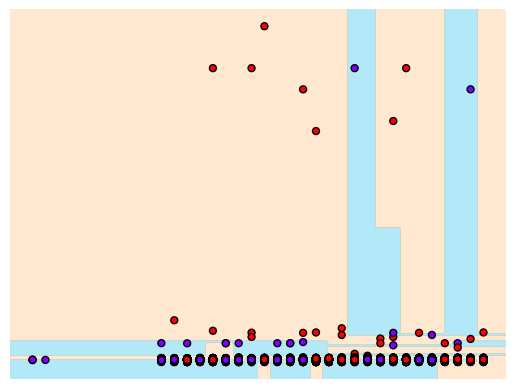

In [42]:
features_0_1 = features.iloc[:, [0, 1]]
visualize_boundary(dtc, features_0_1, targets)

In [43]:
# 이제 정리할것 